# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


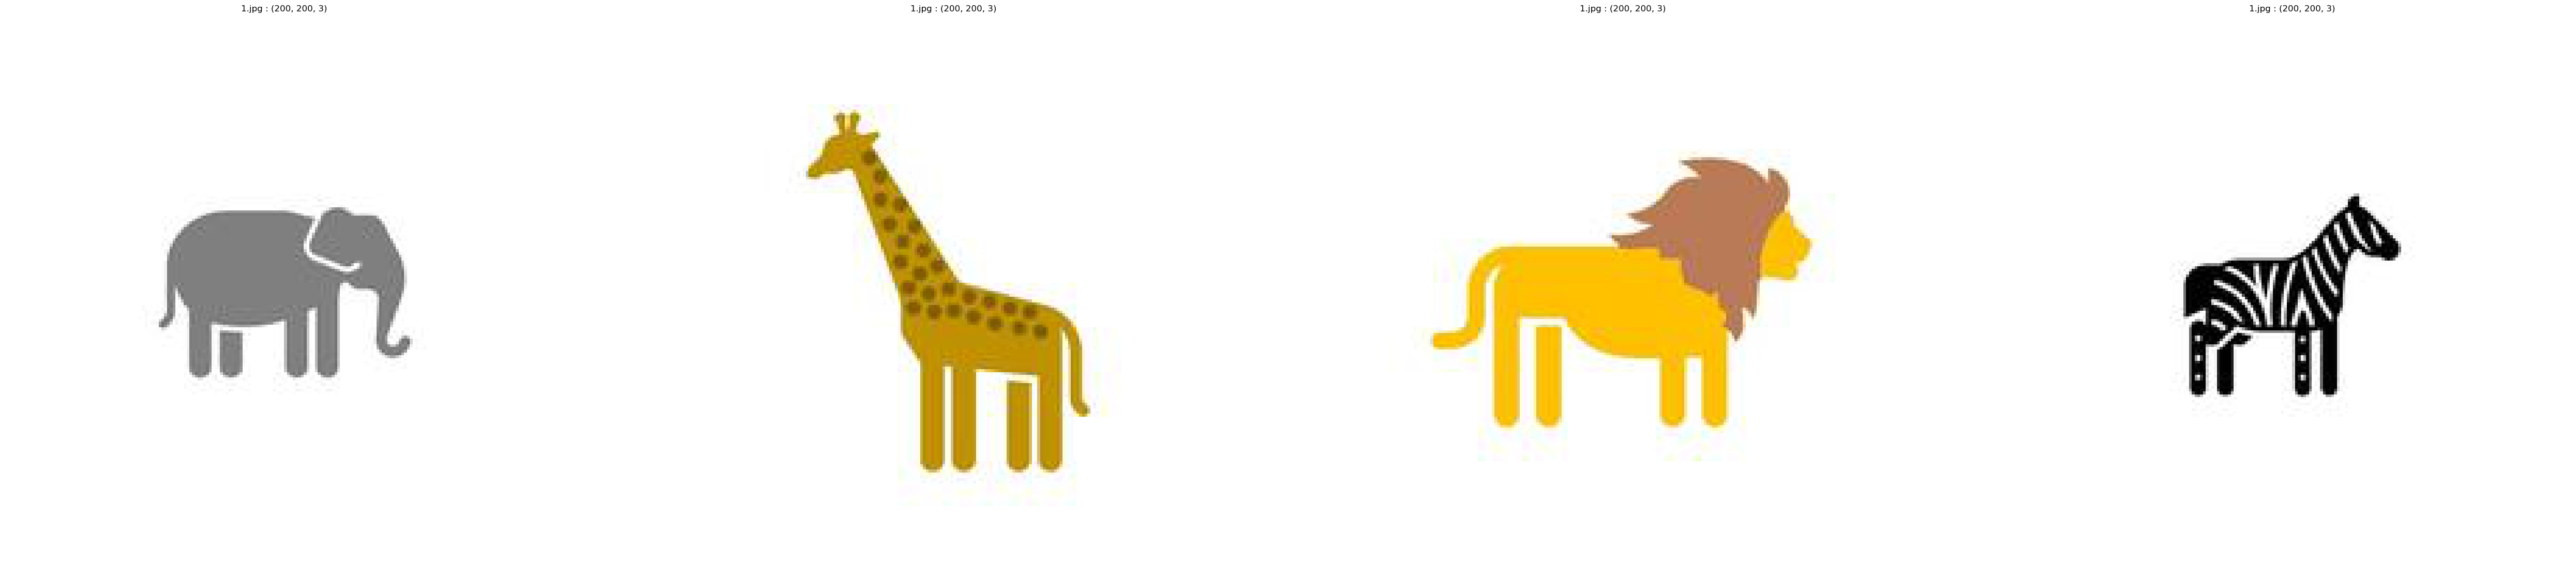

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
# You need to change the data_path to match the location of your images
data_path = "/Users/henko/Downloads/Project/safari/safari/training"
# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(64, 64))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

### Install and import TensorFlow

In [7]:
#Your libraries here
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import seaborn as sns 

from tensorflow import keras
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix

### Define CNN
Below are some suggested steps to follow or you can use your own steps to define your CNN.

In [14]:
# Define the model as a sequence of layers
model = Sequential()
# Input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6),padding='same', activation='relu', input_shape=(32, 32, 3)))
# Add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolution and max pooling layer
model.add(Conv2D(64, (6, 6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolution and max pooling layer
model.add(Conv2D(128, (6, 6),padding ='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.5))
# Flatten the feature maps 
model.add(Flatten())
# Generate an output layer with a predicted probability for each class
model.add(Dense(10, activation='softmax')) #Should be 4 output classes not 10 
# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Learning Rate ? 
# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        3488      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         295040    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

### Train the model
Train a CNN model with 10 epochs.

In [15]:
# Your Code to train a CNN model...
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

#Normalize pixel values between 0 and 1 
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255 

# Convert class vectors to binary class matrices(one hot encoding)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

#Train Model 
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.5732 - accuracy: 0.4250 - val_loss: 1.2427 - val_accuracy: 0.5526
Epoch 2/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.2082 - accuracy: 0.5691 - val_loss: 1.0435 - val_accuracy: 0.6326
Epoch 3/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.0534 - accuracy: 0.6275 - val_loss: 0.9883 - val_accuracy: 0.6561
Epoch 4/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.9550 - accuracy: 0.6648 - val_loss: 0.9145 - val_accuracy: 0.6778
Epoch 5/10
1563/1563 [==============================] - 113s 73ms/step - loss: 0.8861 - accuracy: 0.6878 - val_loss: 0.9077 - val_accuracy: 0.6865
Epoch 6/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.8282 - accuracy: 0.7098 - val_loss: 0.8845 - val_accuracy: 0.6937
Epoch 7/10
1563/1563 [==============================] - 112s 71ms/step - loss: 0.7840 - accuracy: 0.7254 - val_loss: 0

### View loss history
- To check for overfitting.

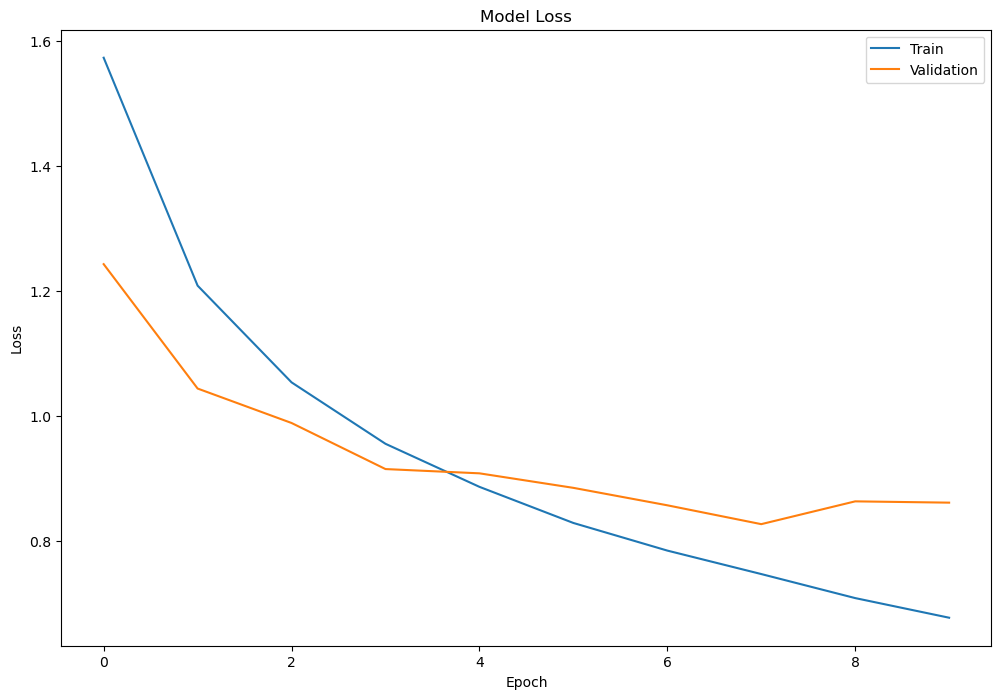

In [17]:
# your code here
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

### Evaluate the model

1/1 [==============================] - 0s 76ms/step


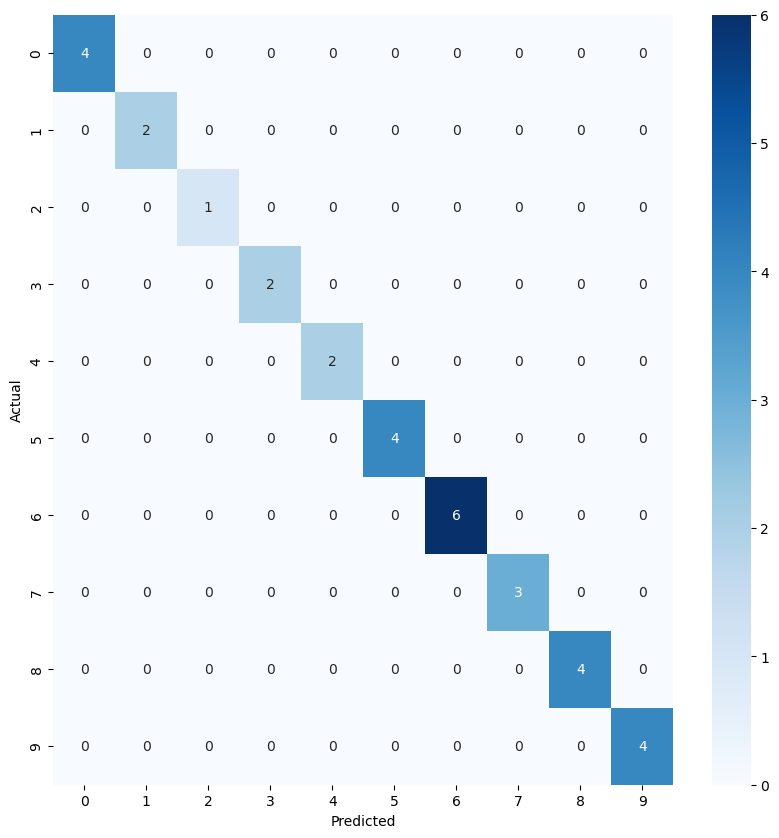

In [19]:
# Get the image and label arrays for the first batch of validation data
x_val_batch = x_test[:32]
y_val_batch = y_test[:32]
# Use the model to predict the class
predictions = model.predict(x_val_batch)
# The model returns a probability value for each class
# # The one with the highest probability is the predicted class
predicted_classes = np.argmax(y_val_batch,axis=1)
# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
actual_classes = np.argmax(y_val_batch,axis=1)
#Compute confusion Matrix
cnf_matrix = confusion_matrix(actual_classes, predicted_classes)
# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Save your model

Add code below to save your model's trained weights.

In [22]:
# Code to save your model
model.save_weights('model_weights.h5')
model.save('model.h5')

### Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

In [1]:
from tensorflow.keras.models import load_model
# If you want to load the model you need to add 
model = load_model('model.h5')

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def load_and_preprocess_image(image_path):
# Load image (In PIL format)
    img = load_img(image_path, target_size=(32, 32)) # change target_size to match your model input
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Normalize image (scale pixel values to the range [0, 1])
    img_array = img_array / 255.0
    # Add an extra dimension (for the batch)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

1/1 [==============================] - 0s 139ms/step
The predicted class is: [7]


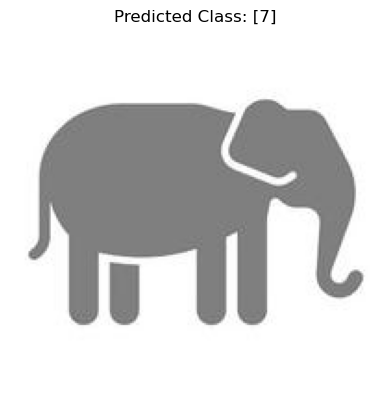

In [38]:
from PIL import Image
# Replace 'test.jpg' with the path of the image you want to predict
img_path = 'safari/safari/test/elephant.jpg'
img_array = load_and_preprocess_image(img_path)

# Use the model to predict the class
predictions = model.predict(img_array)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predicted_class = np.argmax(predictions, axis=1)

print("The predicted class is:", predicted_class)

img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


## Web Interface

In [29]:
# Your code here
import base64
import io

# !pip install dash
# !pip install jupyter_dash

import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output, State
import jupyter_dash

from tensorflow.keras.models import load_model
from PIL import Image


C:\Users\henko\AppData\Local\Temp\ipykernel_14040\313372728.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\henko\AppData\Local\Temp\ipykernel_14040\313372728.py:10: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [30]:
# Load the pre-trained model
model = load_model('model.h5')

In [31]:
# Create the app
app = jupyter_dash.JupyterDash(__name__)

In [32]:
# App layout
app.layout = html.Div([
    html.H1('Image Classifier'),

    # Upload images
    dcc.Upload(
        id='upload-image',
        children=html.Div([
            'Drag and Drop or ',
            html.A('Select Image')
        ]),
        style={
            'width': '300px',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        }
    ),

    # Display the image
    html.Div(id='output-image-upload'),
    html.Div(id='prediction')
])

In [33]:
# Helper function to process uploaded image and make predictions
def process_image(image):
    img = Image.open(image)
    img = img.resize((224, 224))  # Resize image to match input size of the model
    img = img.convert('RGB')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    img = tf.expand_dims(img, 0)  # Add batch dimension
    return img

In [34]:
# Helper function to process uploaded image and make predictions
def process_image(image):
    img = Image.open(image)
    img = img.resize((224, 224))  # Resize image to match input size of the model
    img = img.convert('RGB')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    img = tf.expand_dims(img, 0)  # Add batch dimension
    return img

In [35]:
# Callback function to handle image upload and make predictions
@app.callback(
    Output('prediction', 'children'), Output('output-image-upload', 'children'), Input('upload-image', 'contents'), State('upload-image', 'filename')
)
def classify_image(contents, filename):
    if contents is not None:
        content_type, content_string = contents.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded))
        processed_image = process_image(image)
        prediction = model.predict(processed_image)
        class_index = tf.argmax(prediction, axis=1)[0]
        class_label = predicted_classes[class_index]  # Replace class_names with your list of class labels
        return (
            html.H3(f'Predicted Class: {class_label}'),
            html.Div([
                html.H5(f'Uploaded Image: {filename}'),
                html.Img(src=contents, style={'width': '300px'})
            ])
        )
    else:
        return html.Div(), html.Div()

In [36]:
# Run the app
if __name__ == '__main__':
    app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[34], line 3, in process_image(
    image=<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200>
)
      2 def process_image(image):
----> 3     img = Image.open(image)
        img = <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x1D84F3757B0>
        image = <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x1D84B5689A0>
        Image = <module 'PIL.Image' from 'c:\\ProgramData\\Anaconda\\lib\\site-packages\\PIL\\Image.py'>
      4     img = img.resize((224, 224))  # Resize image to match input size of the model
      5     img = img.convert('RGB')

File c:\ProgramData\Anaconda\lib\site-packages\PIL\Image.py:3236, in open(
    fp=<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200>,
    mode='r',
    formats=['BMP', 'DIB', 'GIF', 'TIFF', 'JPEG', 'PPM', 'PNG']
)
   3233    

Hopefully, your model predicted all four of the image classes correctly!